<a href="https://colab.research.google.com/github/cequintero/automatas_final/blob/main/maquinas_touring_ocultar_mensaje_en_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Máquinas de Turing para realizar compresión de imágenes e incluir mensajes ocultos
Primero, se elige la imagen a comprimir, se segmenta en los 3 canales (RGB). Luego, se procesa con una máquina de Turing que genera una secuencia de bits a partir de las imágenes seleccionadas. Se agrega el mensaje a la imagen mediante una segunda maquina de Turing. Finalmente, se comprime sin perdidas la secuencia de bits mediante otra máquina de Turing.

In [ ]:
# carga de librerias
!pip install automata-lib==5.0.0

In [ ]:
from automata.tm.dtm import DTM

### 1. Selección de las imágenes

Se pueden seleccionar imágenes de cualquier tamaño, pero se recomienda que sean imágenes de menor tamaño a 2MB para que el proceso de compresión sea más rápido. De igual forma, puede continuar con una imagen de prueba que ya se encuentra precargada en el proyecto. Las imágenes a comprimir pueden ser seleccionadas de forma manual (Formato **png**) y subirlas al notebook ejecutando el siguiente bloque de código:

In [ ]:
!rm penguins*

In [ ]:
!wget https://raw.githubusercontent.com/cequintero/automatas/main/images/penguins-xlow.png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

--2022-03-18 15:29:10--  https://raw.githubusercontent.com/cequintero/automatas/main/images/penguins-xlow.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1235 (1.2K) [image/png]
Saving to: ‘penguins-xlow.png’

penguins-xlow.png   100%[===================>]   1.21K  --.-KB/s    in 0s      

2022-03-18 15:29:10 (30.8 MB/s) - ‘penguins-xlow.png’ saved [1235/1235]



In [ ]:
!ls

penguins-xlow.png  sample_data


In [ ]:
img = mpimg.imread('/content/penguins-xlow.png')
print(img) # array con los valores de la imagen
x,y,z = img.shape
print('Dimensiones de la imagen: ', x, ' x ', y,'(', z, ' canales)')

[[[0.23529412 0.30980393 0.03921569]
  [0.24705882 0.32156864 0.02352941]
  [0.23921569 0.3019608  0.        ]
  [0.23529412 0.29411766 0.        ]
  [0.20392157 0.25490198 0.        ]
  [0.20784314 0.2509804  0.01568628]
  [0.14509805 0.17254902 0.01960784]
  [0.09019608 0.12156863 0.03137255]
  [0.12941177 0.16862746 0.08627451]]

 [[0.30588236 0.3882353  0.06666667]
  [0.31764707 0.39607844 0.03137255]
  [0.35686275 0.43529412 0.06666667]
  [0.34117648 0.41960785 0.05882353]
  [0.34509805 0.41568628 0.07058824]
  [0.2627451  0.32941177 0.03529412]
  [0.27450982 0.34901962 0.0627451 ]
  [0.23137255 0.3019608  0.07450981]
  [0.21568628 0.29803923 0.13725491]]

 [[0.3764706  0.45882353 0.09411765]
  [0.40392157 0.4862745  0.10588235]
  [0.43529412 0.5176471  0.15686275]
  [0.4392157  0.54509807 0.16862746]
  [0.35686275 0.4117647  0.20392157]
  [0.28235295 0.27450982 0.29803923]
  [0.42352942 0.5137255  0.30980393]
  [0.44313726 0.5803922  0.3137255 ]
  [0.37254903 0.5176471  0.3254902

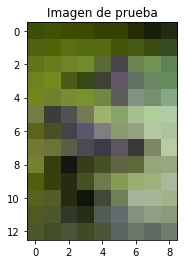

In [ ]:
plt.title('Imagen de prueba')
plt.imshow(img)

### 2. Segmentación de las imágenes en canales RGB
Las imágenes seleccionadas se segmentan en 3 canales RGB (rojo, verde, azul) utilizando el siguiente código:

(13, 9, 3)


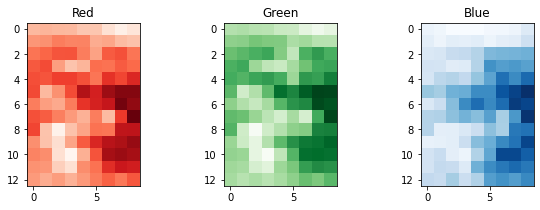

In [ ]:
print(img.shape)
r,g,b = np.split(img, 3, axis=2)
f, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].set_title('Red')
axs[0].imshow(r.squeeze(), cmap='Reds')
axs[1].set_title('Green')
axs[1].imshow(g.squeeze(), cmap='Greens')
axs[2].set_title('Blue')
axs[2].imshow(b.squeeze(), cmap='Blues')
plt.show()

In [ ]:
def getStringOfArrayFloat(arr):
  print('Arreglo de una dimension (float): ', arr)
  arr*=255
  arr = arr.astype(int)
  resp = ""
  print('arreglo de enteros (0~255): ', arr)
  for i in arr:
    resp += '{0:08b}'.format(i)
  print('String (binario primeros 6 bytes): ', resp[0:48])
  return resp


In [ ]:
print('===  Red  ===')
rString = getStringOfArrayFloat(r.flatten())
print('===  Green  ===')
gString = getStringOfArrayFloat(g.flatten())
print('===  Blue  ===')
bString = getStringOfArrayFloat(b.flatten())

===  Red  ===
Arreglo de una dimension (float):  [0.23529412 0.24705882 0.23921569 0.23529412 0.20392157 0.20784314
 0.14509805 0.09019608 0.12941177 0.30588236 0.31764707 0.35686275
 0.34117648 0.34509805 0.2627451  0.27450982 0.23137255 0.21568628
 0.3764706  0.40392157 0.43529412 0.4392157  0.35686275 0.28235295
 0.42352942 0.44313726 0.37254903 0.42745098 0.4509804  0.2901961
 0.21176471 0.24313726 0.3882353  0.38039216 0.42352942 0.39607844
 0.44705883 0.43529412 0.4745098  0.4745098  0.44313726 0.37254903
 0.5019608  0.4627451  0.5254902  0.45490196 0.23529412 0.31764707
 0.4509804  0.6156863  0.54509807 0.654902   0.6901961  0.6901961
 0.35686275 0.2901961  0.26666668 0.36078432 0.49803922 0.5411765
 0.5764706  0.70980394 0.67058825 0.44313726 0.41960785 0.3529412
 0.29803923 0.2509804  0.35686275 0.23137255 0.4862745  0.7294118
 0.4627451  0.21176471 0.08235294 0.21568628 0.2784314  0.38039216
 0.37254903 0.5882353  0.5921569  0.32156864 0.21568628 0.15294118
 0.2784314  0.4235

In [ ]:
#se comprueba extencion del mensaje
#si es menor que el tamano de un canal se copleta con 0s y los otros canales se comopletan con 0s
#si es mayor que el mensaje que el canal se trunca en el maximo que puede almacenar el canal y el restante se envia al siguiente canal

maxChanel = (x*y)
print('El tamano maximo del mensaje a ocultar es: ', maxChanel*3, 'bits o', int((maxChanel*3)/8), 'bytes (caracteres)')
mensaje = input('Por favor ingrese el mensaje a ocultar: ')
mensaje = ''.join('{0:08b}'.format(ord(i), 'b') for i in mensaje)
print('Equivalente en "binario" al mensaje: ', mensaje[0:48], 'primeros 6 bytes')
if len(mensaje) < maxChanel*3:
  print('El mensaje es adecuado para ser oculto en la imagen: ', len(mensaje), ' de ', maxChanel*3, 'bits\n')
  mensaje += ''.join('0' for i in range(maxChanel*3-len(mensaje)))
else:
  print('ERR el mensaje es demaciado grande, se truncara al maximo ocultable en la imagen')

mensajeR = mensaje[0:maxChanel]
mensajeG = mensaje[maxChanel:maxChanel*2]
mensajeB = mensaje[maxChanel*2:maxChanel*3]
print('Equivalente en "binario" al mensaje: ', mensaje[0:48], 'primeros 6 bytes')

El tamano maximo del mensaje a ocultar es:  351 bits o 43 bytes (caracteres)
Por favor ingrese el mensaje a ocultar: mensaje
Equivalente en "binario" al mensaje:  011011010110010101101110011100110110000101101010 primeros 6 bytes
El mensaje es adecuado para ser oculto en la imagen:  56  de  351 bits

Equivalente en "binario" al mensaje:  011011010110010101101110011100110110000101101010 primeros 6 bytes


### 3. Procesamiento de las imágenes con una máquina de Turing:
Las imágenes se procesan con una máquina de Turing que genera una secuencia de bits agregando el mensaje oculto en los últimos bits (menos significativos)  . La máquina de Turing se implementa utilizando el siguiente código:

In [ ]:
#se concatena el mensaje a ocultar en binario
rString += '#' + mensajeR
gString += '#' + mensajeG
bString += '#' + mensajeB


In [ ]:
#Def. maquina de turing
# ocultar mensaje
dtm = DTM(
    states={'q0', 'q1', 'q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12'},
    input_symbols={'0', '1', '#'},
    tape_symbols={'0', '1', '#','.', '*'}, #El punto se usa para limpiar el símbolo de la cinta y el * para marcar
    transitions={
        'q0': {
            '1':('q1','1','R'),
            '0':('q1','0','R'),
            '#':('q8','#','R')
        },
        'q1': {
            '1':('q2','1','R'),
            '0':('q2','0','R')
        },
        'q2':{
            '1':('q3','1','R'),
            '0':('q3','0','R')
        },
        'q3':{
            '1':('q4','1','R'),
            '0':('q4','0','R')
        },
        'q4':{
            '1':('q5','1','R'),
            '0':('q5','0','R')
        },
        'q5':{
            '1':('q6','1','R'),
            '0':('q6','0','R')
        },
        'q6':{
            '1':('q7','1','R'),
            '0':('q7','0','R')
        },
        'q7':{
            '1':('q8','*','R'),
            '0':('q8','*','R')  
        },
        'q8':{
            '1':('q8','1','R'),
            '0':('q8','0','R'),
            '#':('q9','#','R')
        },
        'q9':{
            '1':('q10','#','L'),
            '0':('q11','#','L'),
            '#':('q9','#','R'),
            '.':('q12','.','L')
        },
        'q10':{
            '1':('q10','1','L'),
            '0':('q10','0','L'),
            '#':('q10','#','L'),
            '*':('q0','1','R')
        },
        'q11':{
            '1':('q11','1','L'),
            '0':('q11','0','L'),
            '#':('q11','#','L'),
            '*':('q0','0','R')
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'q12'}
)

In [ ]:
#prueba de la MT
res = dtm.read_input('001001010010010000100010001000000001111000100000#110101')
print(res.tape.get_symbols_as_str())

001001010010010100100010001000010001111000100001#######.


In [ ]:
# obtener cinta MT canar R
rResTM = dtm.read_input(rString)
rMTString = rResTM.tape.get_symbols_as_str()

# obtener cinta MT canar G
gResTM = dtm.read_input(gString)
gMTString = gResTM.tape.get_symbols_as_str()

# obtener cinta MT canar B
bResTM = dtm.read_input(bString)
bMTString = bResTM.tape.get_symbols_as_str()

In [ ]:
#transforma un string (binario) a un array con las dimenciones originales de la imagen
def reconstruirImagen(cString):
  print('Binario a reconstruir: ', cString[0:48], '(primeros 6 bytes)')
  stringLimpio = cString.split('#')[0]
  reconstruido = ' '.join('{0:n}'.format(int(stringLimpio[i*8:(i+1)*8],2), 'b') for i in range(int(len(stringLimpio)/8)))
  print(reconstruido[0:48])
  reconstruido = np.array(reconstruido.split())
  reconstruido = reconstruido.astype(int)
  return reconstruido.reshape(x,y,1)

In [ ]:
# recuperar imagen y comparar
rReconstruido = reconstruirImagen(rMTString)
gReconstruido = reconstruirImagen(gMTString)
bReconstruido = reconstruirImagen(bMTString)
imgReconstruida = (np.concatenate((rReconstruido,gReconstruido,bReconstruido),axis=2))

Binario a reconstruir:  001111000011111100111101001111000011010100110101 (primeros 6 bytes)
60 63 61 60 53 53 36 23 32 79 81 90 86 89 66 71 
Binario a reconstruir:  010011100101001001001100010010100100000001000000 (primeros 6 bytes)
78 82 76 74 64 64 44 30 42 98 100 110 106 106 84
Binario a reconstruir:  000010100000011000000000000000000000000000000100 (primeros 6 bytes)
10 6 0 0 0 4 4 8 22 16 8 16 14 18 8 16 18 34 24 


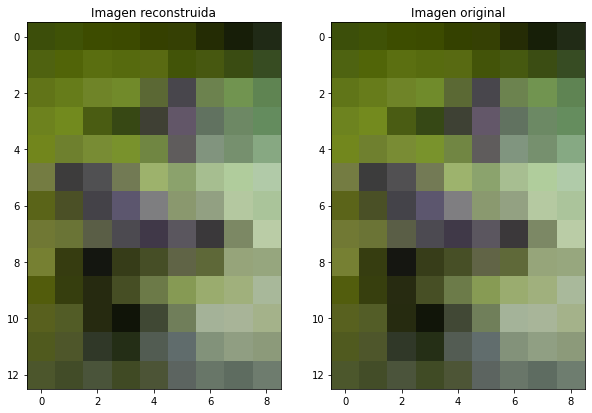

In [ ]:
from IPython.core.pylabtools import figsize
f, axs = plt.subplots(1,2, figsize=(10,7))
axs[0].set_title('Imagen reconstruida')
axs[0].imshow(imgReconstruida)
axs[1].set_title('Imagen original')
axs[1].imshow(img)

In [ ]:
rMTString += '#'

In [ ]:
# decodificar el mensaje
# recuperar mensaje
dtm2 = DTM(
     states={'q0', 'q1', 'q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14'},
     input_symbols={'0', '1', '#','*'},
     tape_symbols={'0', '1', '#','.','*'}, #El punto se usa para limpiar el símbolo de la cinta.
     transitions={
        'q0': {
            '1':('q1','1','R'),
            '0':('q1','0','R'),
            '#':('q14','#','R'),
        },
        'q1': {
            '1':('q2','1','R'),
            '0':('q2','0','R')
        },
        'q2':{
            '1':('q3','1','R'),
            '0':('q3','0','R')
        },
        'q3':{
            '1':('q4','1','R'),
            '0':('q4','0','R')
        },
        'q4':{
            '1':('q5','1','R'),
            '0':('q5','0','R')
        },
        'q5':{
            '1':('q6','1','R'),
            '0':('q6','0','R')
        },
        'q6':{
            '1':('q7','1','R'),
            '0':('q7','0','R')
        },
        'q7':{
            '0':('q8','*','R'),
            '1':('q9','*','R')  
        },
        'q8':{
            '1':('q8','1','R'),
            '0':('q8','0','R'),
            '#':('q10','#','R')
        },
        'q9':{
            '1':('q9','1','R'),
            '0':('q9','0','R'),
            '#':('q11','#','R')
        },
        'q10':{
            '.':('q12','0','L'),
            '1':('q10','1','R'),
            '0':('q10','0','R')
        },
        'q11':{
            '.':('q13','1','L'),
            '1':('q11','1','R'),
            '0':('q11','0','R')
        },
        'q12':{
            '1':('q12','1','L'),
            '0':('q12','0','L'),
            '#':('q12','#','L'),
            '*':('q0','0','R')
        },
        'q13':{
            '1':('q13','1','L'),
            '0':('q13','0','L'),
            '#':('q13','#','L'),
            '*':('q0','1','R')
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'q14'}
)

In [ ]:
#prueba de la MT
res = dtm2.read_input('001001010010010100100010001000000001111000100001#')
print(res.tape.get_symbols_as_str())

001001010010010100100010001000000001111000100001#110001


In [ ]:
rMenssage = rMTString.split('#')[0] + '#'
gMenssage = gMTString.split('#')[0] + '#'
bMenssage = bMTString.split('#')[0] + '#'

# obtener cinta MT canar R
rMessageTM = dtm2.read_input(rMenssage)
rMessage = rMessageTM.tape.get_symbols_as_str()

# obtener cinta MT canar G
gMessageTM = dtm2.read_input(gMenssage)
gMessage = gMessageTM.tape.get_symbols_as_str()

# obtener cinta MT canar B
bMessageTM = dtm2.read_input(bMenssage)
bMessage = bMessageTM.tape.get_symbols_as_str()

In [ ]:
stringLimpio = (rMessage.split('#')[1]+gMessage.split('#')[1]+bMessage.split('#')[1])
messageReconstruido = ' '.join('{0:n}'.format(int(stringLimpio[i*8:(i+1)*8],2), 'b') for i in range(int(len(stringLimpio)/8)))

In [ ]:
# toma el string de numeros y los trasforma en un string medinate el uso de la tabla ascii
decodificado = ""
for numero in messageReconstruido.split(' '):
  if numero != '0':
    letra = chr(int(numero))
    decodificado += letra
print(decodificado)

mensaje
